<a href="https://colab.research.google.com/github/Zainab-Aijaz/Data-Science-project/blob/main/Project_1_Titanic_Survival_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#Data processing

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')
df=(titanic_data)

**In actuall data set their is 891 rows and 12 column**

In [ ]:
df.shape

(891, 12)

**Some information about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Number of passengers**

In [ ]:
str(len(df.index))

'891'

**Just to see first five rows**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Wrangling

**Check Null values**

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Drop "Cabin" column Because most of the rows are empty**
**axis 1 represents column**

In [ ]:
df = df.drop(columns='Cabin', axis=1)


#Imputation

**Handling the missing value in "Age" column with mean Value**

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace = True)


/tmp/ipython-input-2777736685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Find the mode value in "Embarked" column**

In [ ]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


**Replacing the missing value in "Embarked" column with mode value**

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)

/tmp/ipython-input-2485308010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**AS four column(Age, Sex, Pclass, Fare) are important features of data set and Survived column is  target column**

In [ ]:
df=df[['Survived','Age','Sex','Pclass','Fare','Embarked']]
print(df)

     Survived        Age     Sex  Pclass     Fare Embarked
0           0  22.000000    male       3   7.2500        S
1           1  38.000000  female       1  71.2833        C
2           1  26.000000  female       3   7.9250        S
3           1  35.000000  female       1  53.1000        S
4           0  35.000000    male       3   8.0500        S
..        ...        ...     ...     ...      ...      ...
886         0  27.000000    male       2  13.0000        S
887         1  19.000000  female       1  30.0000        S
888         0  29.699118  female       3  23.4500        S
889         1  26.000000    male       1  30.0000        C
890         0  32.000000    male       3   7.7500        Q

[891 rows x 6 columns]


#Data Analysis

**Some statistical measurment about the data**

In [ ]:
df.describe()

,Survived,Age,Pclass,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,2.308642,32.204208
std,0.486592,13.002015,0.836071,49.693429
min,0.000000,0.420000,1.000000,0.000000
25%,0.000000,22.000000,2.000000,7.910400
50%,0.000000,29.699118,3.000000,14.454200
75%,1.000000,35.000000,3.000000,31.000000
max,1.000000,80.000000,3.000000,512.329200


**Check the number of people survived or Not survived**

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


#Data visualization

As this data set mention 549 people are not survived and 342 survived , in the data visualization I plot the graph it also convey the same message through the frequency(count)


In [ ]:
sns.set()

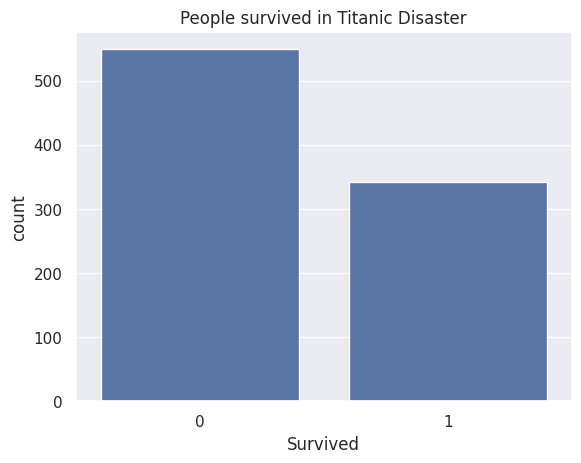

In [ ]:
sns.countplot(x='Survived',data=df)
plt.xlabel="Survived"
plt.title("People survived in Titanic Disaster")
plt.show()

 **Number of male is greater then female**

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


**Check the Gender (Survived or Not Survived)Count**

Males had a lower survival rate
Females had more survival rate

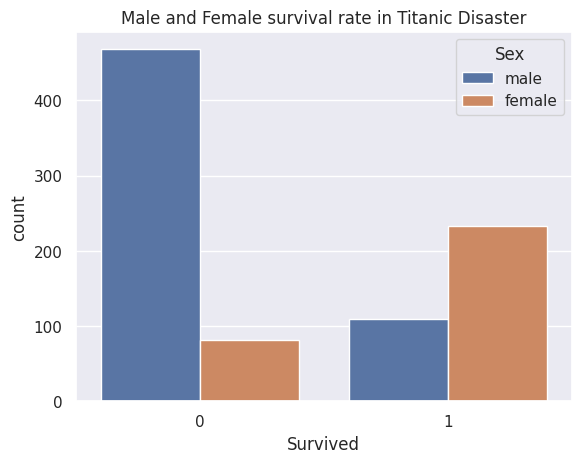

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title("Male and Female survival rate in Titanic Disaster")
plt.show()

#*Insight*

---
As already we know that number of male is greater then female
but in the time of titanic accident female have been given more priority to be saved so it is very logical


**Overhere the passengers who did not survived majority of the  3rd class(lowest class)**

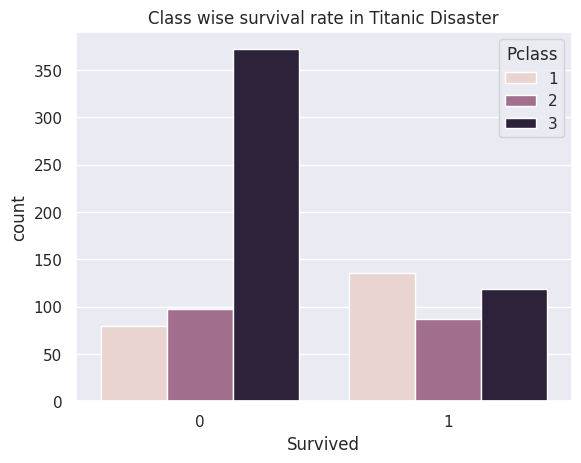

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title("Class wise survival rate in Titanic Disaster")
plt.show()


**this plot shows that we have more young passengers and more mediocore age (30)passengers**

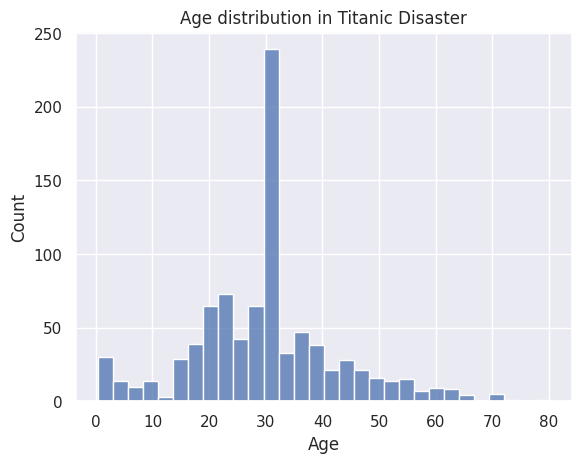

In [ ]:
sns.histplot(x='Age', data=df)
plt.title("Age distribution in Titanic Disaster")
plt.show()

**Fare size is between 0 to 100**

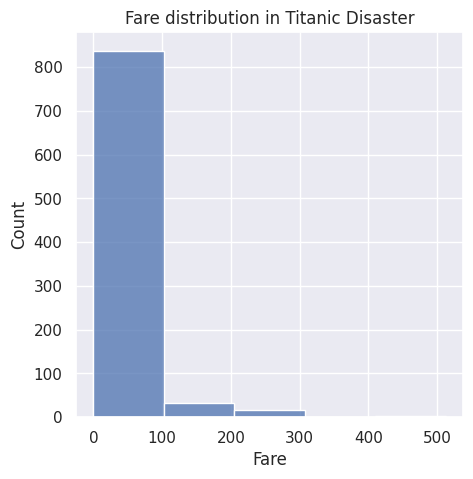

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='Fare' ,data=df, bins=5)
plt.title("Fare distribution in Titanic Disaster")
plt.show()

In first Class and second class tends to be more older rather than we have it in the third class .. Well that depends on the Experience how much they earn or might be there any number of reasons

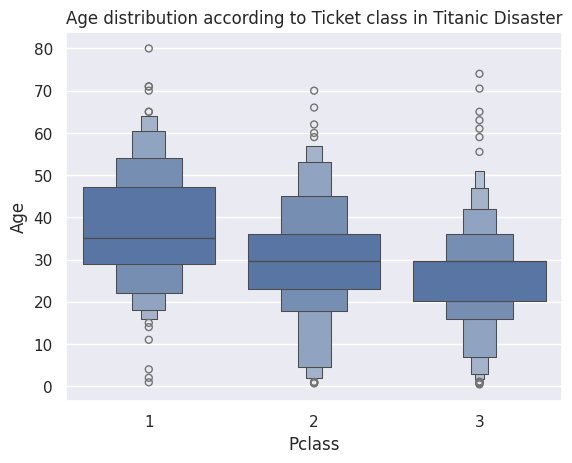

In [ ]:
sns.boxenplot(x="Pclass", y="Age", data=df)
plt.title("Age distribution according to Ticket class in Titanic Disaster")
plt.show()


#Encoding the Categorical column

**Categorical columns are encoded because machine learning algorithms require numerical input to perform mathematical computations. In this titanic data set we use LogisticRegression Modal**

In [ ]:
df['Sex'].value_counts()


,count
Sex,
male,577
female,314


**Converting catagorical Column**

In [ ]:
df.replace({'Sex':{'male':0,'female':1}}, inplace=True)

/tmp/ipython-input-1230574020.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0,'female':1}}, inplace=True)


In [ ]:
df.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

/tmp/ipython-input-2440767386.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [ ]:
df.head(5)

,Survived,Age,Sex,Pclass,Fare,Embarked
0,0,22.0,0,3,7.2500,0
1,1,38.0,1,1,71.2833,1
2,1,26.0,1,3,7.9250,0
3,1,35.0,1,1,53.1000,0
4,0,35.0,0,3,8.0500,0


#Separate features and Target

We split features and target so the model can learn from the input variables (features) and predict the correct output (target).

In context (Titanic):

Features (X) → Age, Sex, Fare, Pclass

Target (y) → Survived

Without this split, the model would not know what to predict and what to learn from.

In [ ]:
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [ ]:
print(X)

           Age  Sex  Pclass     Fare  Embarked
0    22.000000    0       3   7.2500         0
1    38.000000    1       1  71.2833         1
2    26.000000    1       3   7.9250         0
3    35.000000    1       1  53.1000         0
4    35.000000    0       3   8.0500         0
..         ...  ...     ...      ...       ...
886  27.000000    0       2  13.0000         0
887  19.000000    1       1  30.0000         0
888  29.699118    1       3  23.4500         0
889  26.000000    0       1  30.0000         1
890  32.000000    0       3   7.7500         2

[891 rows x 5 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#Spliting data into Training data and test data

We use a train–test split to check how well the model performs on new, unseen data.

Why this matters:

Training data → model learns patterns

Testing data → model is evaluated fairly

Without a train–test split, the model might just memorize the data and give misleadingly high accuracy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Model Training

#Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

#Prediction

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)


[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


#Evaluating The Model

#Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7932960893854749
